Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)

 1 -- building_windows_float_processed
 
 2 --building_windows_non_float_processed
 
 3 --vehicle_windows_float_processed
 
 4 --vehicle_windows_non_float_processed (none in this database)
 
 5 --containers
 
 6 --tableware
 
 7 --headlamps

In [1]:
import pandas as pd
import numpy as np

In [2]:
glass = pd.read_csv('glass.csv')
glass.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [43]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [3]:
glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [13]:
# Normalization function 
def norm_func(i):
    x = (i-i.min()) /(i.max() - i.min())
    return (x)

In [16]:
# Normalized data frame (considering the numerical part of data)
glass_norm = norm_func(glass.iloc[:,0:9]) # nomalise all columns except 9th i.e Type column
# norm_func = func we define to normalise the data
glass_norm.head(10)  # Top 10 rows


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.000000
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.000000
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.000000
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.000000
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.000000
5,0.211150,0.309774,0.804009,0.414330,0.564286,0.103060,0.245353,0.0,0.509804
6,0.275680,0.386466,0.801782,0.264798,0.585714,0.093398,0.254647,0.0,0.000000
7,0.281387,0.363910,0.804009,0.236760,0.612500,0.091787,0.261152,0.0,0.000000
8,0.352502,0.497744,0.797327,0.336449,0.405357,0.090177,0.266729,0.0,0.000000
9,0.280948,0.341353,0.801782,0.333333,0.567857,0.091787,0.276022,0.0,0.215686


In [22]:
glass_norm['Type']=glass.iloc[:,9] 
glass_norm.head(10)
 # creating a  new column and assigning it to new column 


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.000000,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.000000,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.000000,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.000000,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.000000,1
5,0.211150,0.309774,0.804009,0.414330,0.564286,0.103060,0.245353,0.0,0.509804,1
6,0.275680,0.386466,0.801782,0.264798,0.585714,0.093398,0.254647,0.0,0.000000,1
7,0.281387,0.363910,0.804009,0.236760,0.612500,0.091787,0.261152,0.0,0.000000,1
8,0.352502,0.497744,0.797327,0.336449,0.405357,0.090177,0.266729,0.0,0.000000,1
9,0.280948,0.341353,0.801782,0.333333,0.567857,0.091787,0.276022,0.0,0.215686,1


In [23]:
# Training and Test data using 
from sklearn.model_selection import train_test_split
train,test = train_test_split(glass_norm,test_size = 0.2) # 0.2 => 20 percent of entire data 

In [25]:
glass_norm.iloc[:,0:9] #=> x values 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [24]:
glass_norm.iloc[:,9] 
# y values => type

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [27]:
#train.iloc[:,0:9]
train.iloc[:,9]

143    2
6      1
67     1
199    7
11     1
      ..
45     1
142    2
112    2
201    7
172    5
Name: Type, Length: 171, dtype: int64

In [28]:
# KNN using sklearn 
# Importing Knn algorithm from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier as KNC

# for 3 nearest neighbours 
glass_model = KNC(n_neighbors= 3)

# Fitting with training data 
# model.fit(x,y)

glass_model.fit(train.iloc[:,0:9],train.iloc[:,9])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [29]:
# train accuracy 
train_acc = np.mean(glass_model.predict(train.iloc[:,0:9])==train.iloc[:,9])
print(train_acc)

# test accuracy
test_acc = np.mean(glass_model.predict(test.iloc[:,0:9])==test.iloc[:,9])
print(test_acc)

# we are geeting close values of of test and train dataset
# which means there is no presence of overfitting and underfitting

0.8187134502923976
0.6976744186046512


In [ ]:
# Here the accuracy we got is not much good
# now rather than performing again and again with diff k values we can apply a loop function for diffrent k values
# and plot it to xamine the stable k value

In [44]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(1,170,2):
    glass_model = KNC(n_neighbors=i)
    glass_model.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc = np.mean(glass_model.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc = np.mean(glass_model.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc.append([train_acc,test_acc])


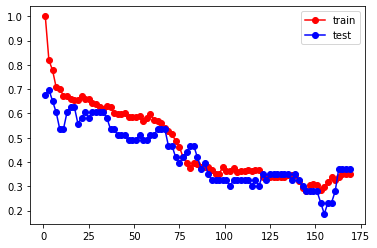

In [45]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(1,170,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(1,170,2),[i[1] for i in acc],"bo-")


plt.legend(["train","test"])
plt.show()



In [ ]:
# herefrom 120-130 we get stable k value but with very low accuracy and
# we get high accuracy only upto k=50 
# so we again examine the above plot from 1 to 50 k value to get out stable k value

In [52]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(1,50,2):
    glass_model = KNC(n_neighbors=i)
    glass_model.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc = np.mean(glass_model.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc = np.mean(glass_model.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc.append([train_acc,test_acc])


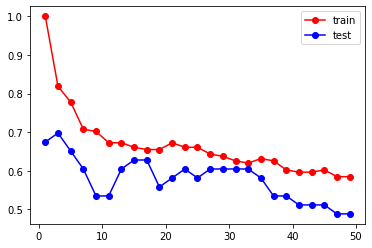

In [53]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(1,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(1,50,2),[i[1] for i in acc],"bo-")


plt.legend(["train","test"])
plt.show()



In [ ]:
# by above plot we can say somewhere in between 5-10 we can get a good accuracy k value and 
# 10-18 we have a stable accuracy for both test and train data

In [55]:
# KNN using sklearn 
# Importing Knn algorithm from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier as KNC

# for 10 nearest neighbours 
zoo_model = KNC(n_neighbors= 2)

# Fitting with training data 
# model.fit(x,y)

zoo_model.fit(train.iloc[:,0:9],train.iloc[:,9])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [56]:
# train accuracy 
train_acc = np.mean(zoo_model.predict(train.iloc[:,0:9])==train.iloc[:,9])
print(train_acc)

# test accuracy
test_acc = np.mean(zoo_model.predict(test.iloc[:,0:9])==test.iloc[:,9])
print(test_acc)

# we are geeting close values of of test and train dataset
# which means there is no presence of overfitting and underfitting

0.8304093567251462
0.6046511627906976


In [57]:
# KNN using sklearn 
# Importing Knn algorithm from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier as KNC

# for 5 nearest neighbours 
zoo_model = KNC(n_neighbors= 5)

# Fitting with training data 
# model.fit(x,y)

zoo_model.fit(train.iloc[:,0:9],train.iloc[:,9])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
# train accuracy 
train_acc = np.mean(zoo_model.predict(train.iloc[:,0:9])==train.iloc[:,9])
print(train_acc)

# test accuracy
test_acc = np.mean(zoo_model.predict(test.iloc[:,0:9])==test.iloc[:,9])
print(test_acc)

# we are geeting close values of of test and train dataset
# which means there is no presence of overfitting and underfitting

0.7777777777777778
0.6511627906976745


In [ ]:
# At k=5 we get our best accuracy values for both test and train